In [25]:
import pandas as pd # provide rows & columns for analysis
import numpy as np #  provide multidimensional array
from matplotlib import pyplot as plt  # provide plotting of 2d graphs
%matplotlib inline

In [26]:
data = pd.read_csv('news_datasets.csv', index_col=[0])

In [27]:
data.head()

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [28]:
data['Title_Len'] = data['title'].apply(lambda x: len(x))
data['Text_Len'] = data['text'].apply(lambda x: len(x))
data.head(10)

,title,text,label,Title_Len,Text_Len
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7518
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,2646
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,2543
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,2660
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48,1840
6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,11,13333
7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,73,3171
95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,33,783
4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,63,13863
2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,71,4296


In [29]:
import string
def punctuation_count(txt):
    count = sum((1 for c in txt if c in string.punctuation))
    return 100*count/len(txt)
data['punctuation_%_title'] = data['title'].apply(lambda x : punctuation_count(x))
data['punctuation_%_text'] = data['text'].apply(lambda x : punctuation_count(x))
data.head(10)

,title,text,label,Title_Len,Text_Len,punctuation_%_title,punctuation_%_text
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7518,0.000000,1.423251
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,2646,2.352941,2.380952
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,2543,0.000000,1.690916
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,2660,4.761905,3.007519
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48,1840,2.083333,3.532609
6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,11,13333,9.090909,2.392560
7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,73,3171,0.000000,1.860612
95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,33,783,0.000000,1.787995
4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,63,13863,7.936508,1.983698
2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,71,4296,0.000000,2.164804


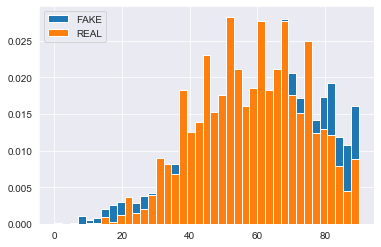

In [30]:
bins = np.linspace(0, 90, 40)
plt.hist(data[data['label'] == 'FAKE']['Title_Len'], bins, label='FAKE', density=True)
plt.hist(data[data['label'] == 'REAL']['Title_Len'], bins, label='REAL', density=True)
plt.legend(loc='upper left')
plt.show()

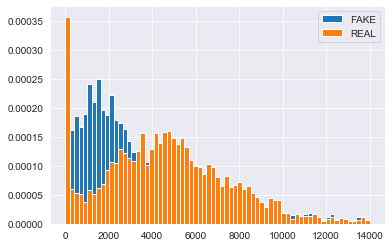

In [31]:
bins = np.linspace(0, 14000, 70)
plt.hist(data[data['label'] == 'FAKE']['Text_Len'], bins, label='FAKE', density=True)
plt.hist(data[data['label'] == 'REAL']['Text_Len'], bins, label='REAL', density=True)
plt.legend(loc='upper right')
plt.show()

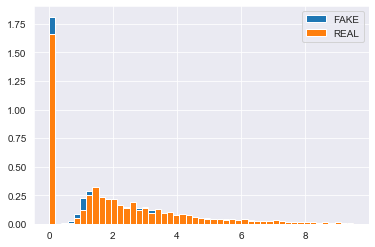

In [32]:
bins = np.linspace(0, 9.5, 50)
plt.hist(data[data['label'] == 'FAKE']['punctuation_%_title'], bins, label='FAKE', density=True)
plt.hist(data[data['label'] == 'REAL']['punctuation_%_title'], bins, label='REAL', density=True)
plt.legend(loc='upper right')
plt.show()

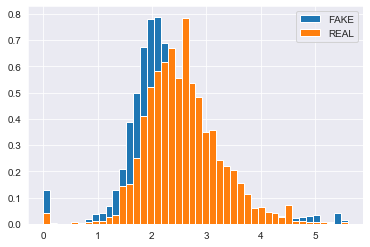

In [33]:
bins = np.linspace(0, 5.6, 45)
plt.hist(data[data['label'] == 'FAKE']['punctuation_%_text'], bins, label='FAKE', density=True)
plt.hist(data[data['label'] == 'REAL']['punctuation_%_text'], bins, label='REAL', density=True)
plt.legend(loc='upper right')
plt.show()

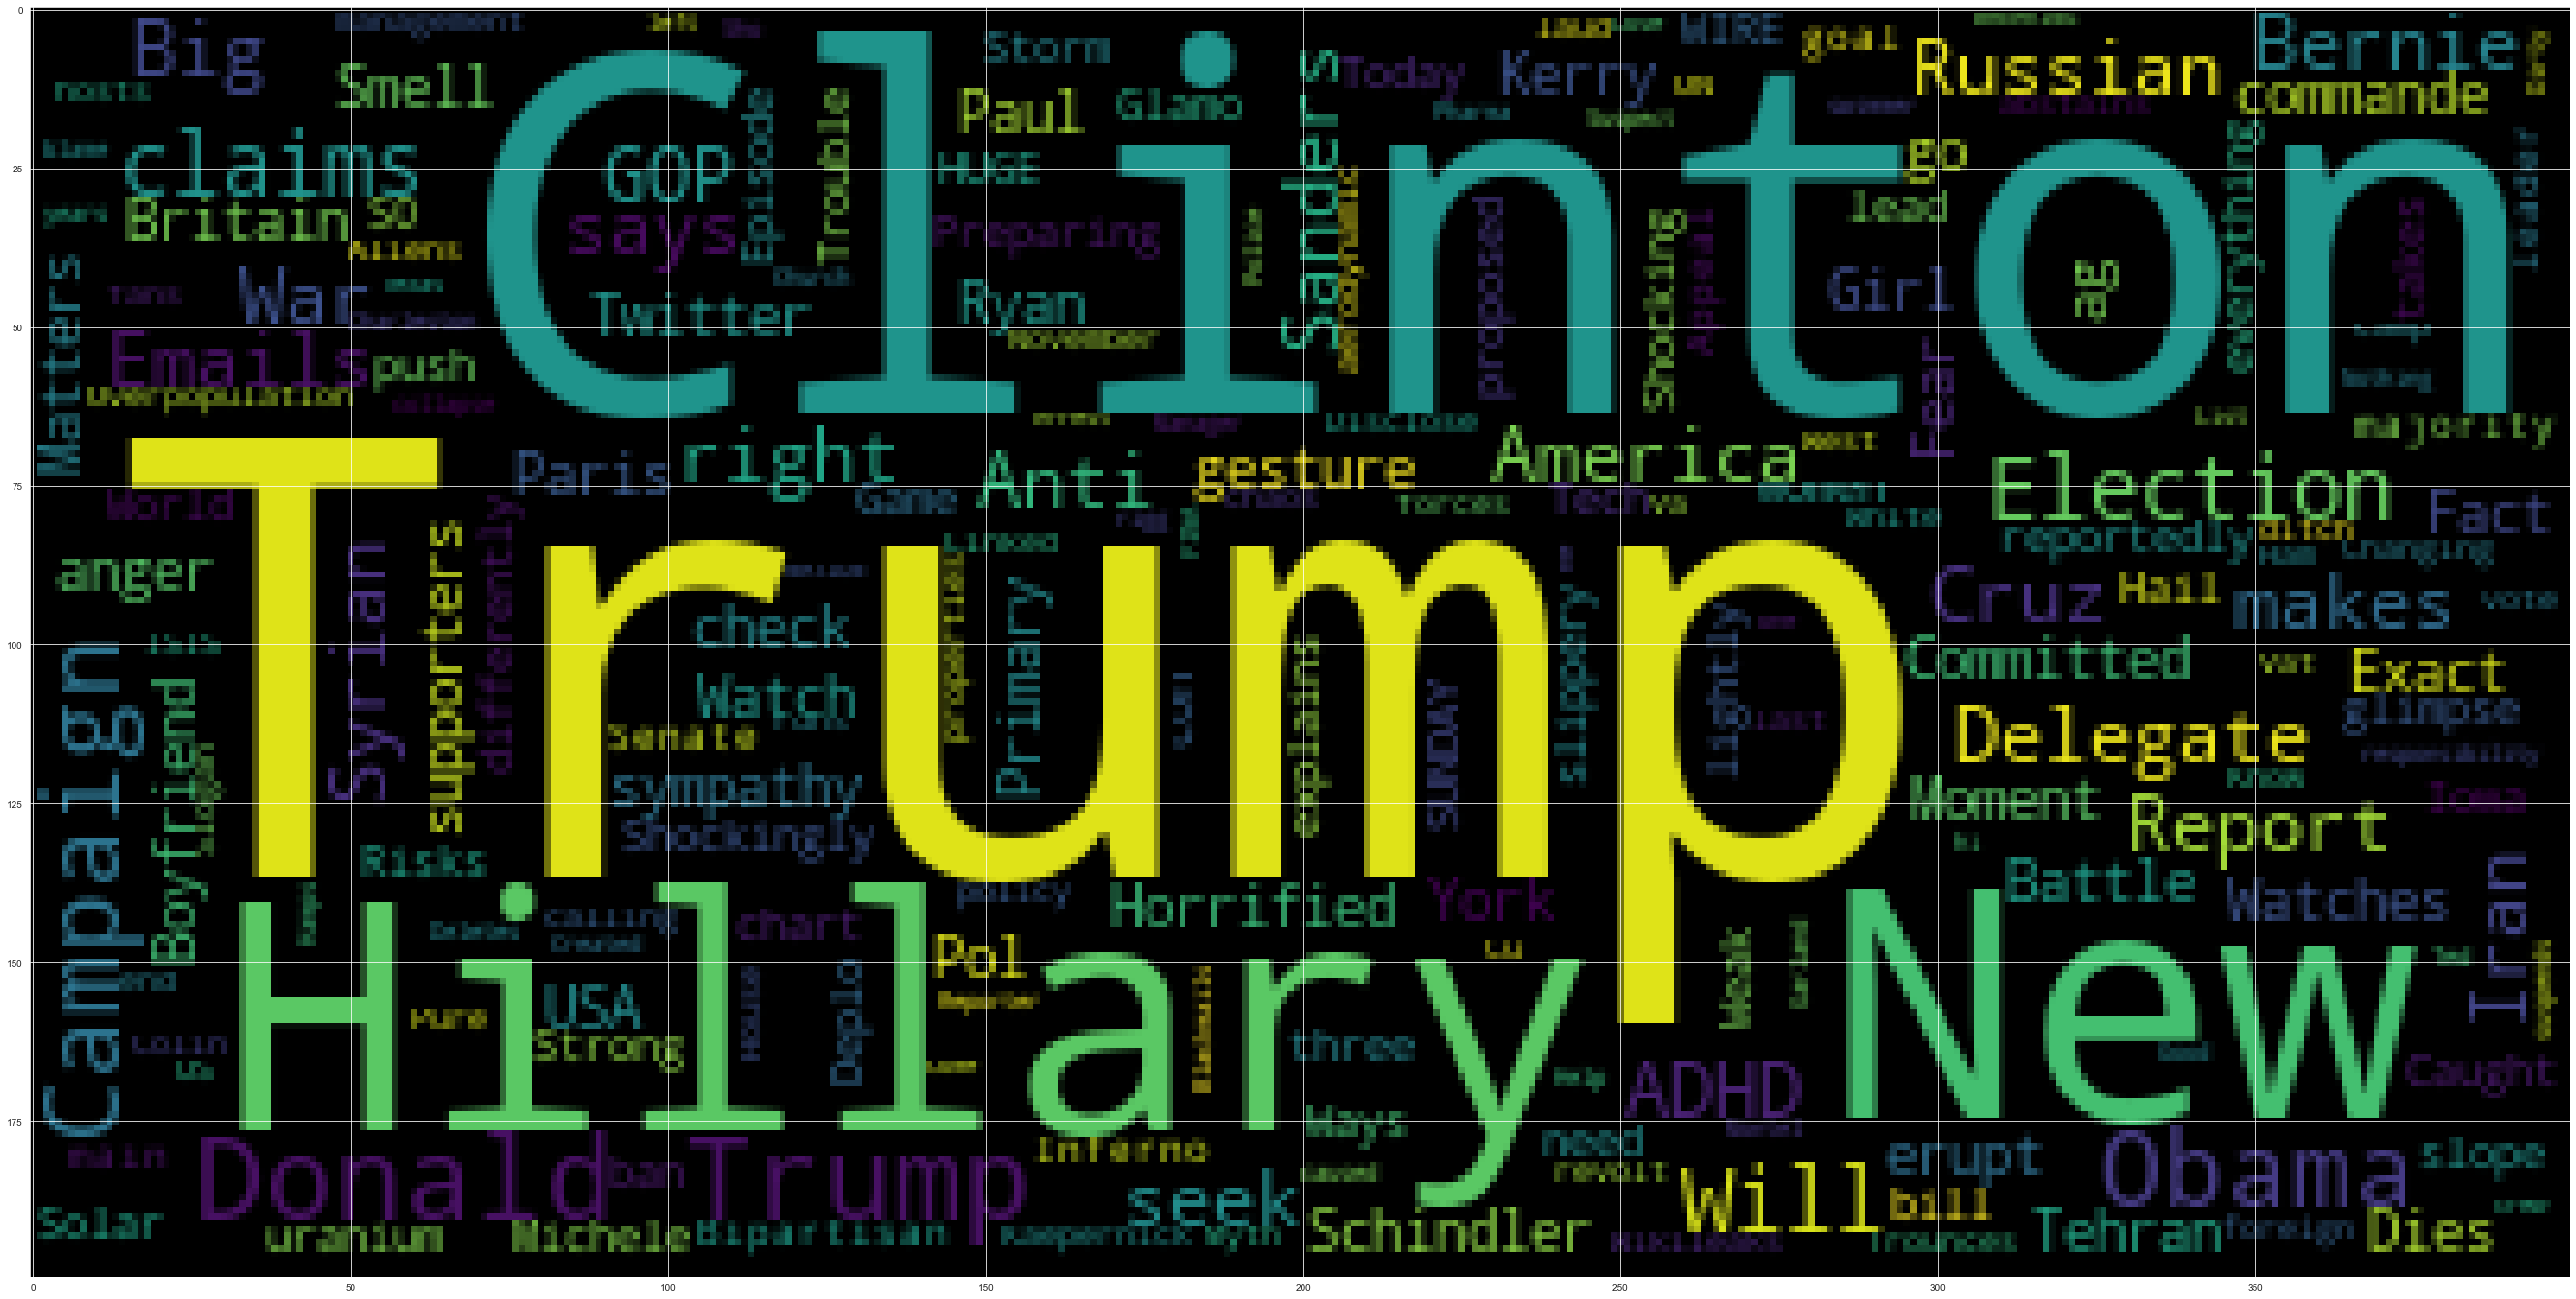

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
WordCloud 
cloud = WordCloud().generate(str(data['title']))
fig=plt.figure(figsize=(47,47))
plt.imshow(cloud)

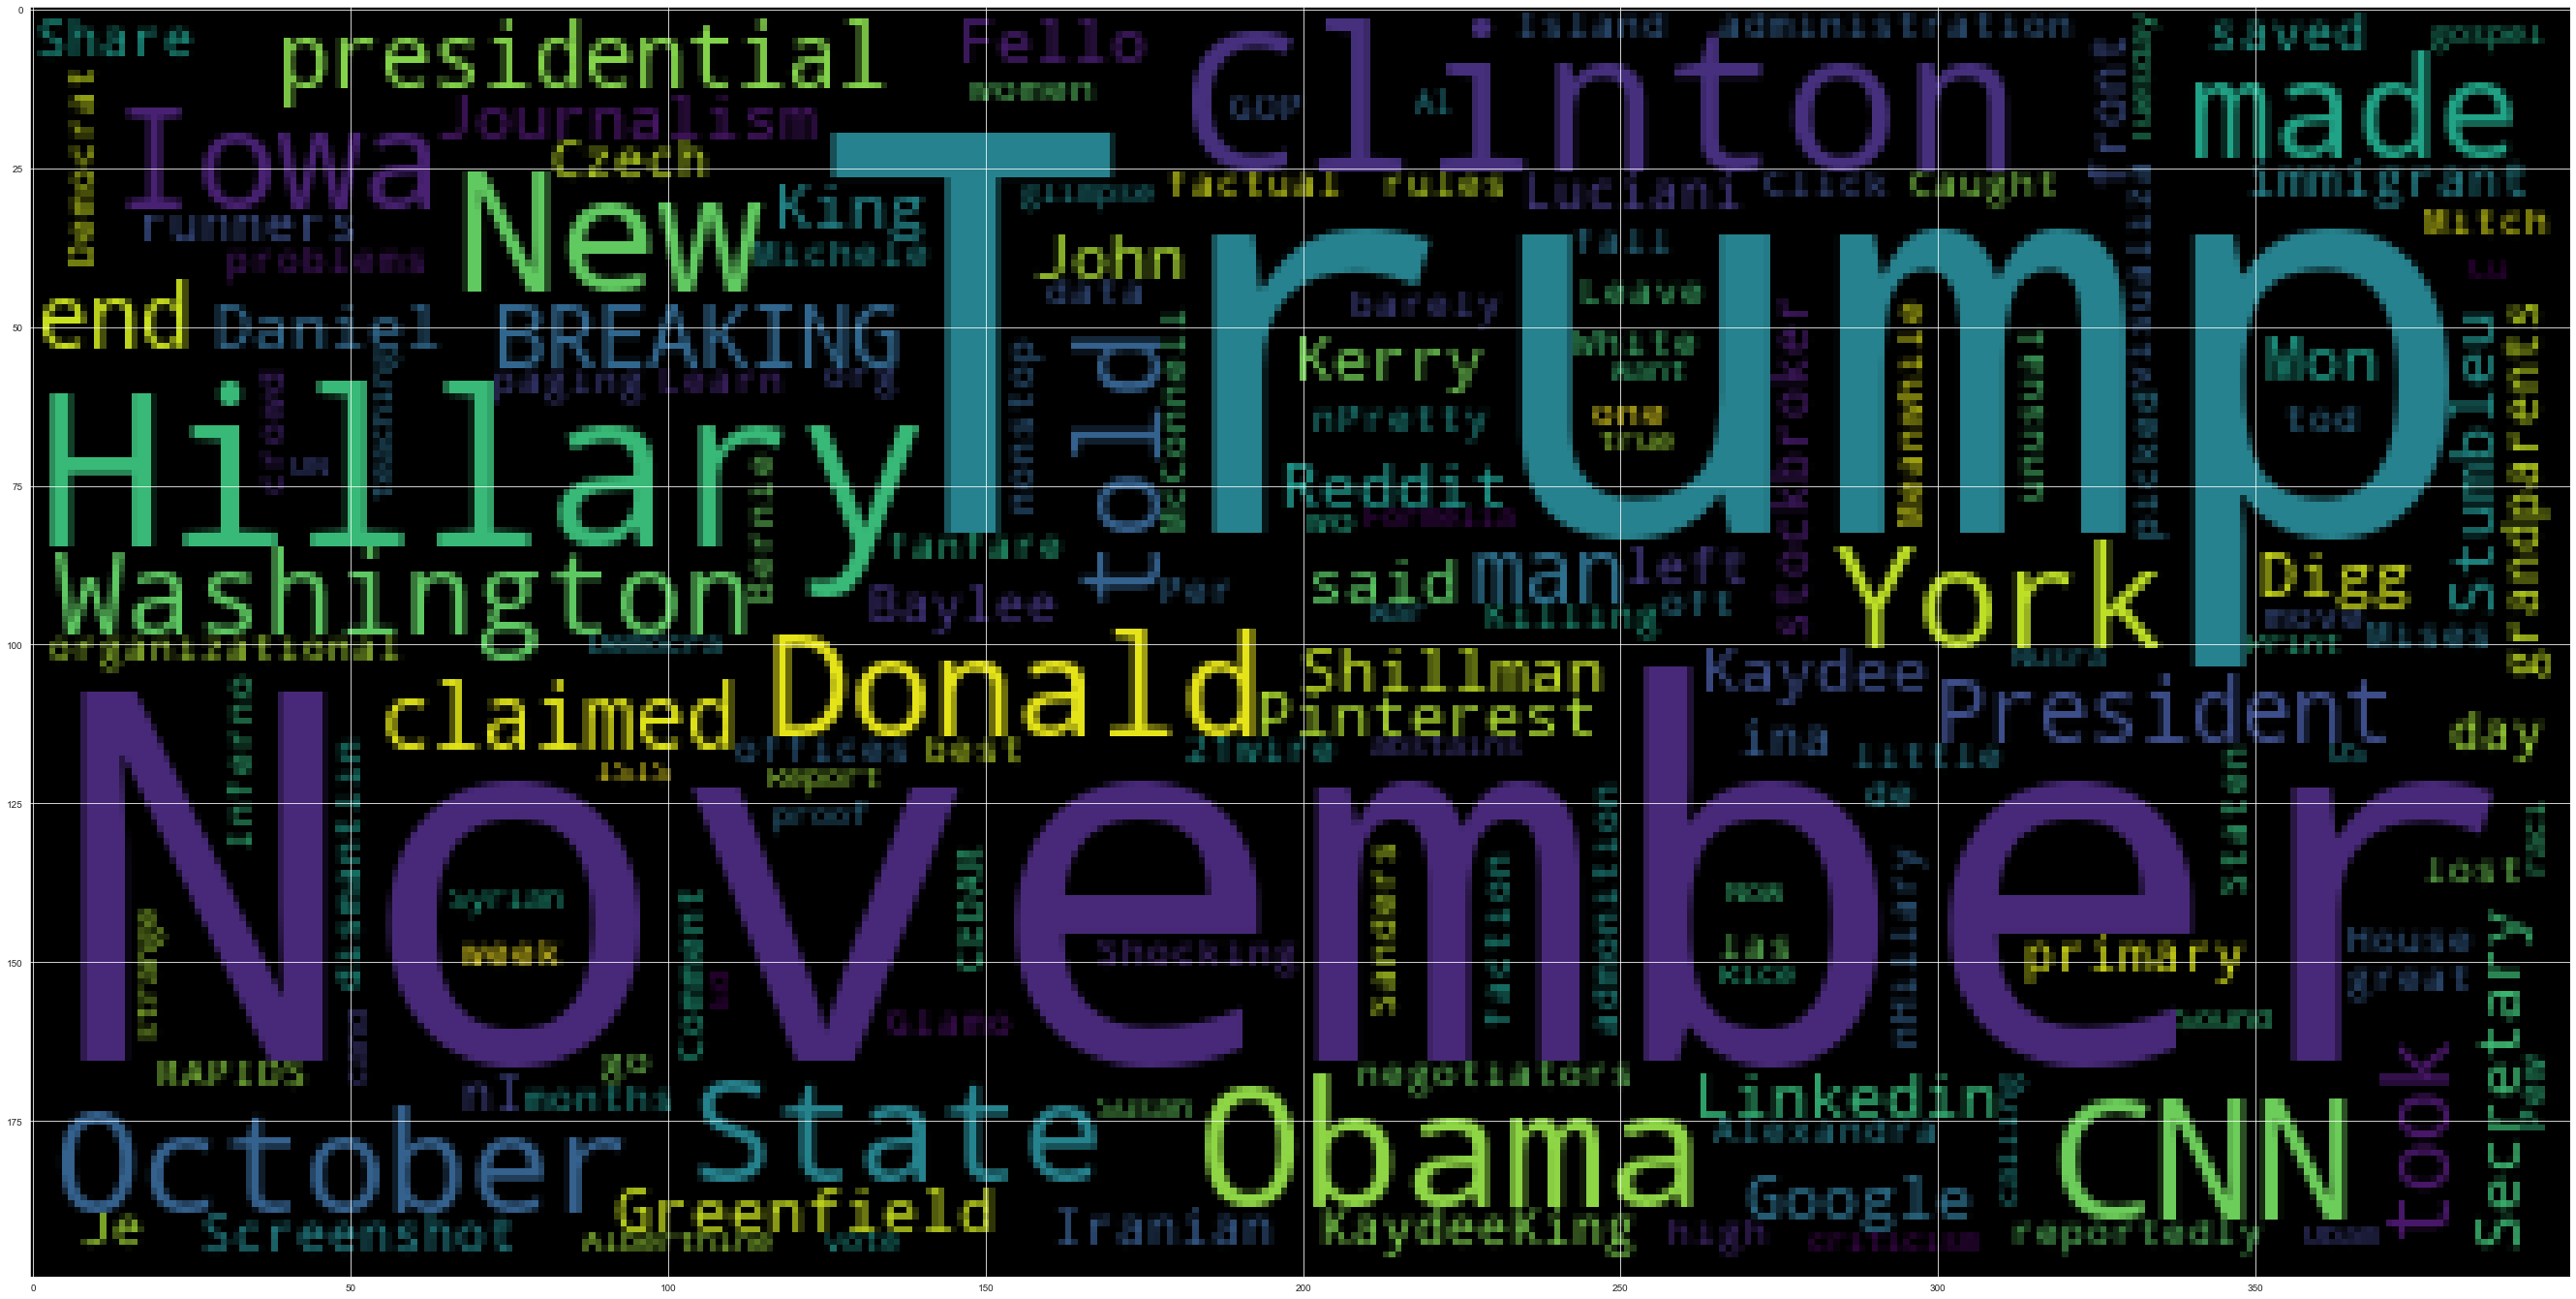

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
WordCloud 
cloud = WordCloud().generate(str(data['text']))
fig=plt.figure(figsize=(47,47))
plt.imshow(cloud)